## Exercise 1

In [1]:
def is_odd(num):
    return "Even" if num % 2 == 0 else "Odd"
    
print(is_odd(3))
print(is_odd(8))

Odd
Even


## Exercise 2: Slice by Condition

In [2]:
import openpyxl

file = openpyxl.load_workbook('./data_set_train-1.xlsx')
ws = file.active

data = []
col = []

for row in ws.iter_rows(max_row = 1):
    for cell in row:
        col.append(cell.value)

for row in ws.iter_rows(min_row = 2):
    ls = []
    for cell in row:
        ls.append(cell.value)
    data.append(ls)

In [3]:
import numpy as np
dataset = np.array(data)
dataset_2006 = dataset[np.char.find(dataset[: , 1], "2006") >= 0, :9]
dataset_2006

array([['강남역우정에쉐르', '2006Q1', '9000.0', ..., '7.0', '37.4942041',
        '127.0435446'],
       ['강남역우정에쉐르', '2006Q1', '9000.0', ..., '7.0', '37.4942041',
        '127.0435446'],
       ['개포주공1단지', '2006Q1', '73000.0', ..., '3.0', '37.4784072',
        '127.061375'],
       ...,
       ['현대빌라트', '2006Q4', '125000.0', ..., '3.0', '37.5179279',
        '127.0428004'],
       ['현대빌라트', '2006Q4', '125000.0', ..., '3.0', '37.5179279',
        '127.0428004'],
       ['현대빌라트', '2006Q4', '125000.0', ..., '3.0', '37.5179279',
        '127.0428004']], shape=(2617, 9), dtype='<U32')

In [4]:
dataset_2006.shape

(2617, 9)

## Exercise 3: Convert Types of ndarrays

In [5]:
price = dataset[:,2].astype(np.float64)
dis_sub = dataset[:,19].astype(np.float64)
np.corrcoef(price, dis_sub)

array([[1.        , 0.03241268],
       [0.03241268, 1.        ]])

## Exercise 4: Yearly Average Price

In [6]:
years = np.arange(2006, 2018, 1)
years = years.astype(str)

for i in years:
    print(i, "Yearly Average Price: ", np.mean(price[np.char.find(dataset[: , 1], i) >= 0]))
        

2006 Yearly Average Price:  67076.57928926252
2007 Yearly Average Price:  58405.71893939394
2008 Yearly Average Price:  66136.66583747928
2009 Yearly Average Price:  83060.50290939318
2010 Yearly Average Price:  77282.02958093672
2011 Yearly Average Price:  76748.97150610584
2012 Yearly Average Price:  72714.51982378855
2013 Yearly Average Price:  78839.01584905661
2014 Yearly Average Price:  84002.69641434263
2015 Yearly Average Price:  87213.44117647059
2016 Yearly Average Price:  97149.95279838167
2017 Yearly Average Price:  114656.7944877172


## Exercise 5: Quarterly Average Price

In [ ]:
quarters = np.array(["Q1", "Q2", "Q3", "Q4"])
arr_size = len(years) * len(quarters) - 1
avg_Price_per_Quarter = np.zeros(arr_size)
num_Transaction_per_Quarter = np.zeros(arr_size)
string_year_quarter = []

for i in range(arr_size):
    string_year_quarter.append(years[i//4] + quarters[i%4])
    num_Transaction_per_Quarter[i] = len(price[np.char.find(dataset[: , 1], string_year_quarter[i]) >= 0])
    avg_Price_per_Quarter[i] = np.mean(price[np.char.find(dataset[: , 1], string_year_quarter[i]) >= 0])
    if i%3 == 0 and i != 0:
        print();
    print(string_year_quarter[i], "Quarterly Average Price: ", round(avg_Price_per_Quarter[i],4), end = "\t")

2006Q1 Quarterly Average Price:  65661.1664	2006Q2 Quarterly Average Price:  59592.4875	2006Q3 Quarterly Average Price:  62410.7243	
2006Q4 Quarterly Average Price:  79588.8299	2007Q1 Quarterly Average Price:  47336.3963	2007Q2 Quarterly Average Price:  65344.6074	
2007Q3 Quarterly Average Price:  58634.6921	2007Q4 Quarterly Average Price:  59687.8912	2008Q1 Quarterly Average Price:  63515.5766	
2008Q2 Quarterly Average Price:  62458.8462	2008Q3 Quarterly Average Price:  72233.9635	2008Q4 Quarterly Average Price:  72608.6237	
2009Q1 Quarterly Average Price:  85574.7692	2009Q2 Quarterly Average Price:  84314.4224	2009Q3 Quarterly Average Price:  83246.4746	
2009Q4 Quarterly Average Price:  78589.3036	2010Q1 Quarterly Average Price:  80386.7252	2010Q2 Quarterly Average Price:  71885.8216	
2010Q3 Quarterly Average Price:  72697.5806	2010Q4 Quarterly Average Price:  82475.984	2011Q1 Quarterly Average Price:  77359.4958	
2011Q2 Quarterly Average Price:  68071.2436	2011Q3 Quarterly Average P

## Exercise 6: Quarterly Price Graph & Histogram

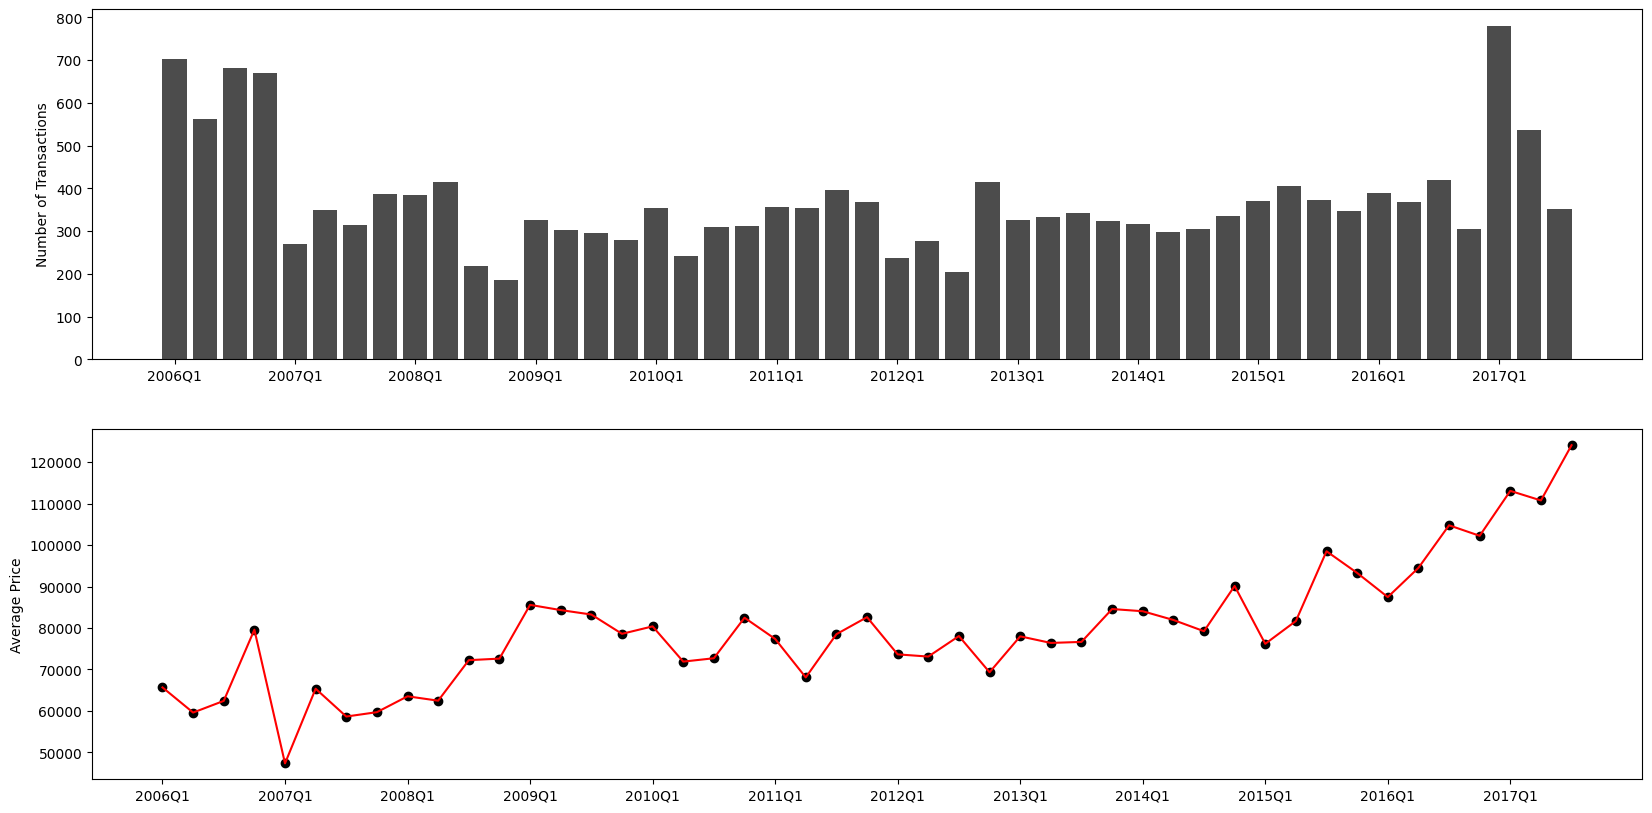

In [8]:
import matplotlib.pyplot as plt

ticks = range(0, len(string_year_quarter), 4)
labels = []
for i in ticks:
    labels.append(string_year_quarter[i])
    
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.bar(string_year_quarter, num_Transaction_per_Quarter, color = 'black', alpha = 0.7)
plt.xticks(ticks=ticks, labels=labels)
plt.ylabel('Number of Transactions')


plt.subplot(2, 1, 2)
plt.plot(string_year_quarter, avg_Price_per_Quarter, color = 'red')
plt.scatter(string_year_quarter, avg_Price_per_Quarter, color = 'black')
plt.xticks(ticks=ticks, labels=labels)
plt.ylabel('Average Price')

plt.show()

## Exercise 7: Using NumPy

In [9]:
# Reshaping
arr1 = np.array(range(1,13,1))
print(arr1)
arr1 = arr1.reshape((3, 4))
print(arr1)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [10]:
# Extracting
arr2 = np.array(range(1,17,1)).reshape((4, 4))
arr2 = arr2[(len(arr2)//2 - 1) : (len(arr2)//2 + 1), (len(arr2[0])//2 - 1) : (len(arr2[0])//2 + 1)]
print(arr2)

[[ 6  7]
 [10 11]]


In [11]:
# Reshape, Slice Rows, Slice Columns
arr3 = np.array(range(1,25,1)).reshape((4, 6)) # Create a 4×6 NumPy array with values from 1 to 24
arr3 = arr3[len(arr3) - 2:, :] # Extract the last two rows
arr3 = arr3[:, (len(arr3[0])//2 - 2) : (len(arr3[0])//2 + 2)] # From the extracted rows, select only the middle four columns
print(arr3)

[[14 15 16 17]
 [20 21 22 23]]


In [12]:
# Reshape, Slice First Two Columns, Reshape Again
arr4 = np.array(range(1,26,1)).reshape((5, 5)) # Create a 5×5 NumPy array with values from 1 to 25
arr4 = arr4[:, :2] # Extract the first two columns
arr4 = arr4.reshape(1,-1) # Reshape the extracted data into a 1D array
print(arr4)

[[ 1  2  6  7 11 12 16 17 21 22]]
